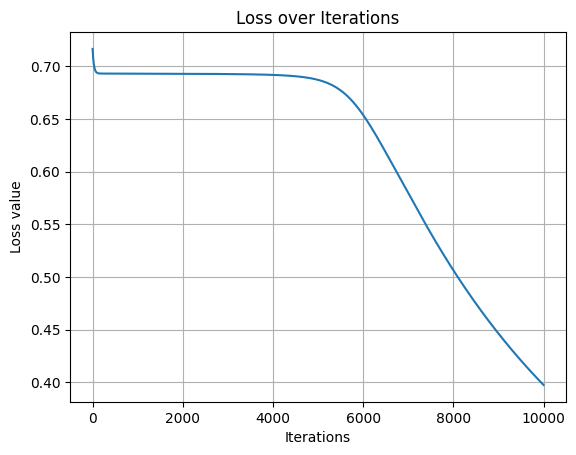

--- Model Predictions ---
Input: [np.int64(1), np.int64(0)], Output: 1
Input: [np.int64(1), np.int64(1)], Output: 0
Input: [np.int64(0), np.int64(1)], Output: 1
Input: [np.int64(0), np.int64(0)], Output: 0


In [1]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt

# Step 1 & 2: Initialize inputs, outputs, and network architecture
x = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
y = np.array([[0, 1, 1, 0]])
n_x = 2 # Number of neurons in input layer
n_y = 1 # Number of neurons in output layer
n_h = 2 # Number of neurons in hidden layer
m = x.shape[1] # Number of training examples
lr = 0.1 # Learning rate

# Step 3: Initialize weights
np.random.seed(2)
w1 = np.random.rand(n_h, n_x) # Weight matrix for hidden layer
w2 = np.random.rand(n_y, n_h) # Weight matrix for output layer
losses = []

# Define the activation function
def sigmoid(z):
    z = 1 / (1 + np.exp(-z))
    return z

# Define forward propagation
def forward_prop(w1, w2, x):
    z1 = np.dot(w1, x)
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1)
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

# Define backpropagation
def back_prop(m, w1, w2, z1, a1, z2, a2, y):
    dz2 = a2 - y
    dw2 = np.dot(dz2, a1.T) / m
    dz1 = np.dot(w2.T, dz2) * a1 * (1 - a1)
    dw1 = np.dot(dz1, x.T) / m
    dw1 = np.reshape(dw1, w1.shape)
    dw2 = np.reshape(dw2, w2.shape)
    return dz2, dw2, dz1, dw1

# Step 4: Start the training loop
iterations = 10000
for i in range(iterations):
    # (i) Forward Pass
    z1, a1, z2, a2 = forward_prop(w1, w2, x)

    # (ii) Compute Loss
    loss = -(1 / m) * np.sum(y * np.log(a2) + (1 - y) * np.log(1 - a2))

    # (v) Record Loss
    losses.append(loss)

    # (iii) Backward Pass
    da2, dw2, dz1, dw1 = back_prop(m, w1, w2, z1, a1, z2, a2, y)

    # (iv) Update Weights
    w2 = w2 - lr * dw2
    w1 = w1 - lr * dw1

# Plot the learning curve
plt.plot(losses)
plt.title("Loss over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss value")
plt.grid(True)
plt.show()

# Step 5: Test the network
def predict(w1, w2, input_data):
    # Use the trained weights to make a prediction
    z1, a1, z2, a2 = forward_prop(w1, w2, input_data)
    a2 = np.squeeze(a2)

    # Classify the output as 0 or 1 based on a 0.5 threshold
    if a2 >= 0.5:
        prediction = 1
    else:
        prediction = 0
    print(f"Input: {[i[0] for i in input_data]}, Output: {prediction}")

# Test for all XOR patterns
print("--- Model Predictions ---")
predict(w1, w2, np.array([[1], [0]]))
predict(w1, w2, np.array([[1], [1]]))
predict(w1, w2, np.array([[0], [1]]))
predict(w1, w2, np.array([[0], [0]]))